In [199]:
from numpy.linalg import norm
from scipy.ndimage import imread
from skimage.transform import resize
import cv2
from matplotlib import pyplot as plt
import numpy as np
import mahotas
%matplotlib inline

In [200]:
class ZernikeMoments:
    def __init__(self, radius):
        self.radius = radius # Size of radius used when computing moments
    
    def describe(self, image): # Returns ZMoments of image
        return mahotas.features.zernike_moments(image, self.radius)

In [201]:
class Searcher:
    # Initializes with an index of sprite Zernike moment features
    # Querying an image's features against it causes it to find the
    # sprite in the database that's nearest
    def __init__(self, index):
        self.index = index
        
    def search(self, queryFeatures):
        results = {}
        for (key, features) in self.index.items():
            distance = norm(queryFeatures - features)
            results[key] = distance
            
        results = sorted([(v, k) for (k, v) in results.items()])
        return results # Nearest sprite is first in list

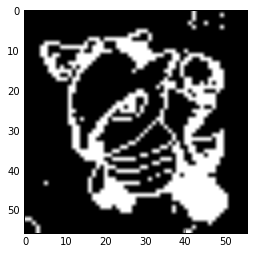

In [246]:
index = open('./pokesprite_index', 'rb')
index = pickle.load(index)

img = imread('./result_img/cropped.png')
img = (resize(img, [56, 56])*255).astype('uint8')

thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY_INV, 43, 21)
plt.imshow(thresh, cmap='gray');

### Adaptive Thresholding

Adaptive thresholding uses a locally calculated threshold, typically the mean Gaussian-weighted sum of the neighboring pixels, shifted by some constant.

In OpenCV, `block_size` determines the neighborhood area, and `C` is the constant by which to translate the thresholds calculated at each pixel.

If we don't shift the threshold using `C`, then each pixel will be white if it's larger than the average of its neighbors, or black if it isn't.

If the neighbors are similar, but not quite the same (as in the case above where the screen was uneven), then by setting C to the range of the neighbors, we can ensure that the threshold will classify the neighbors in the same way.

A larger neighborhood will be less sensitive to rapid variations in intensity, whereas a smaller one might be insufficiently sensitive, causing small genuinely dark regions to be thresholded high.

In [247]:
outline = np.zeros(img.shape, dtype='float32')
_, cnts, _ = cv2.findContours(thresh.copy(), mode=cv2.RETR_EXTERNAL,
                          method=cv2.CHAIN_APPROX_SIMPLE)
extCnt = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
outline = cv2.drawContours(outline, [extCnt], -1, 255, -1)

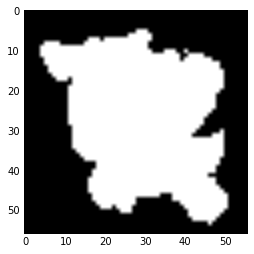

In [248]:
plt.imshow(outline, cmap='gray')

In [253]:
desc = ZernikeMoments(21) # Initialize ZM instance
queryFeatures = desc.describe(outline) # Get 21 ZM features

searcher = Searcher(index) # Initialize db
results = searcher.search(queryFeatures) # Return list of nearest images
print('It\'s a %s!' % results[0][1])

It's a marowak!


In [255]:
results

[(0.032153144502341809, 'marowak'),
 (0.068165151936781659, 'magikarp'),
 (0.068434675174685572, 'pidgeot'),
 (0.072307076271018844, 'sandslash'),
 (0.07336799164263258, 'omastar'),
 (0.075658016760308783, 'tentacruel'),
 (0.075666030147053948, 'drowzee'),
 (0.076131063208810468, 'clefable'),
 (0.079785008089570439, 'haunter'),
 (0.079876814401607613, 'venomoth'),
 (0.082224252114632509, 'pidgeotto'),
 (0.083337709826857134, 'nidorina'),
 (0.085128531110667593, 'parasect'),
 (0.08764963976375853, 'scyther'),
 (0.087737335283488149, 'nidorino'),
 (0.088567818501552903, 'dugtrio'),
 (0.089852288727979721, 'gengar'),
 (0.090826040320067317, 'butterfree'),
 (0.091069052985062418, 'nidoqueen'),
 (0.092312412318774476, 'psyduck'),
 (0.093507541523223464, 'golbat'),
 (0.093813935220733544, 'seaking'),
 (0.09429391195217908, 'raticate'),
 (0.094659797107673568, 'jynx'),
 (0.094834285143228766, 'tangela'),
 (0.095065555617758785, 'kangaskhan'),
 (0.095144376850815351, 'jolteon'),
 (0.0955327714